<a href="https://colab.research.google.com/github/SamwelJane/Financial-inclusion-in-East-Africa/blob/master/2_Moringa_Data_Science_Core_W_Independent_Project_2019_08_Samwel_Jane_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# a) Defining the Question
Financial Inclusion remains one of the main obstacles to economic and human development in Africa.  Having a bank account has been considered to be one of the financial inclusion towards this goal in Africa
In this project we are going to :
**Figure out how we can predict which individuals are most likely to have or use a bank account ?**. 

Our solution will be  help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic components that might
drive individuals’ financial outcomes. 

# b) Specifying the Data Analytic Question
## FORMULATED  HYPOTHESIS
# Null Hypothesis(Ho):  
The condition that an individaul  ave a bank account is depeneded  on  type of location , Marrital status, cell phone,Level of Educuation	,Type of Job,Respondent Age, and 	gender of respondent 
 
# Alternative Hypothesis(H1):
Having a bank account is not associated on ype of location , Marrital status, cell phone,Level of Educuation	 and Type of Job, Respondent Age, and 	gender of respondent 
 

# c) Defining the Metric for Success
Find out parameters that tells whether  an individual has a bank account or not .
We shall reject the hypothesis  if the P-value is greater than significance value or not reject the hypothesis if the P-value is greater than significance level. It willl be compared with the  the crical value to determine it. We shall also  calaculate the PCA in order to determine whether the model will shall predict will have an accuracy level of more than 85%.
To attain the measurement of accuracy , we shall  divide the population to a training sample and  a test sample.



## Data Relevance

Here we get to import labriries that wil be used  in this analysis


In [0]:
#Import libraries
#Reading the Data
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Seaborn
import seaborn as sns
anomalies = []
import seaborn as sb
# importing linear regression from sci kit learn
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Reading the dataset
Our dataset is in form of URl  and so we shall first  read our dataset by loading the The URL   in this collab by using pandas  which is stated as (pd)

In [4]:
#Loading the Data from the source
#defination= http://bit.ly/VariableDefinitions 
#Dataset=http://bit.ly/FinancialDataset 
# our datasframe will be called (df)
# the first dataframe is called defination and this defines  what column names  mean in our dataset.
definations= pd.read_csv("http://bit.ly/VariableDefinitions")
df= pd.read_csv("http://bit.ly/FinancialDataset")
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# Checking Data
Here we get to explore more about the dataset such as  shape of our dataset,head and tail,type of data type in the columns, whether we have  null values in the  data set.

In [0]:
# Determining the no. of records in our dataset
# in this code we want to fine the number of raws and the number of columns in our dataset.
# the dataset has 23524 raws and 13 columns.
df.shape

(23524, 13)

In [5]:
# Previewing the top of our dataset
#In the dataset difination we get to explore what the column names really mean in our main dataset
# example of what  a column and  explanation is Year, this means the "year" in which the "Year survey was done in"
definations.head()

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


In [0]:
# Previewing the bottom of our dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [8]:
#checking the information our dataset
#In this code we get to  have an exploration overview of the number of raws we have depending on each column and the datatype they contain.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [0]:
#Checking whether each column has an appropriate datatype
#Some of the data type that we have in this dataset are intergers,objects and floats
# 10 columns have object, 2 columns had floats and 1 column  had intergers 
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [0]:
# checking sum of null missing values in each column
# each column has  missing values appart from only 2 column and  that is year and uniqueid

df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [9]:
# checking the profile of our dataset
# We curious to know    a brief  summary  our dataset  and may not be limited  to:
#missing values in a column? How are the features co-related? What is the max, min or Outlier in the data?
# what insights can we get one we  plot and Visualize this data and see the details.

#There are functions available in Pandas to get that insight like describe,info etc. 
#but those are pretty basics and with the help of Data Visualization tools like matplotlib, seaborne and plotly we can plot the visualization as well.


#Documentation Following Statistics is generated for each of the column:

#Essentials: type, unique values, missing values
#Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
#Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
#Most frequent values Histogram
#Correlations highlighting of highly correlated variables, Spearman and Pearson matrixes

import pandas_profiling


pandas_profiling.ProfileReport(df)

Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [0]:
print(df.country.unique())
print(df['Has a Bank account'].unique())
print(df['year'].unique())
print(df['Type of Location'].unique())

print(df['uniqueid'].unique())

print(df['Cell Phone Access'].unique())

print(df['household_size'].unique())

print(df['Respondent Age'].unique())

print(df['gender_of_respondent'].unique())

print(df['The relathip with head'].unique())


print(df['marital_status'].unique())

print(df['Level of Educuation'].unique())

print(df['Type of Job'].unique())



['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
['Yes' 'No' nan]
[2018 2029 2056 2016 2039 2017]
['Rural' 'Urban' nan]
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
['Yes' 'No' nan]
[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]
['Female' 'Male' nan]
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know' nan]
['Secondary education' 'No formal

# Tidying the dataset

Central tendancy

In [0]:
# finding out the mean
print (df['household_size'].mean())
print (df['Respondent Age'].mean())

3.6818181818181817
38.804299702000854


In [0]:
# finding out the median

print (df['household_size'].median())
print (df['Respondent Age'].median())

3.0
35.0


In [0]:
#finding the  mode
print (df['household_size'].mode())
print (df['Respondent Age'].mode())


0    2.0
dtype: float64
0    30.0
dtype: float64


In [0]:
# finding out the mode
df['year'].mode()


0    2016
dtype: int64

In [0]:
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [0]:
#dealing with missing values
df=df.dropna()
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

# Exploratory Analysis

 External Data Source Validation

In [0]:
# Dropping column
df1=df.drop('uniqueid',axis=1)
df1.head(2)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [0]:
#renaming  columns from the dataset
df2= df1.rename(columns={'Respondent Age': 'respondent_age','Has a Bank account':'bank_account'
                         ,'the_relathip_with_head':'relationship_with_head','level_of_educuation':'level_of_education'})

df2.head(3)

,country,year,bank_account,Type of Location,Cell Phone Access,household_size,respondent_age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [0]:
df2.columns

Index(['country', 'year', 'bank_account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

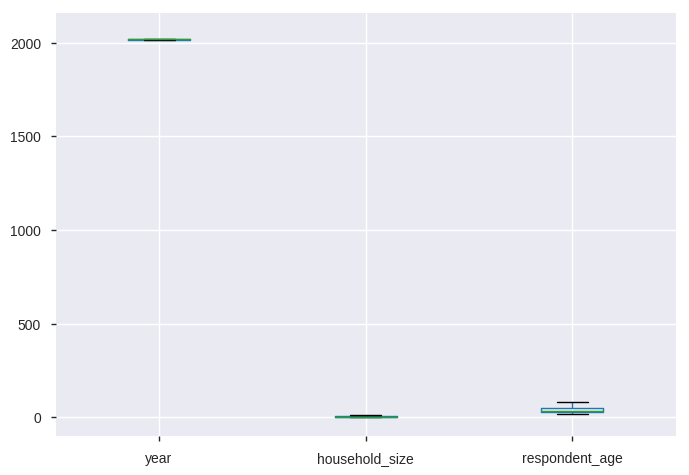

In [0]:
# finding the outliers
# since we only have three  columns  that contain numerical values
# we shall use thos ecolumns to check the outliers
#That is year,household size and respondent age
#seaborn is the one used to  plot the boxplot of numerical variables

#sns.boxplot(df3['year'],showmeans=True)
#sns.boxplot(df3['year'])
plt.figure(dpi=100)
df2.boxplot()

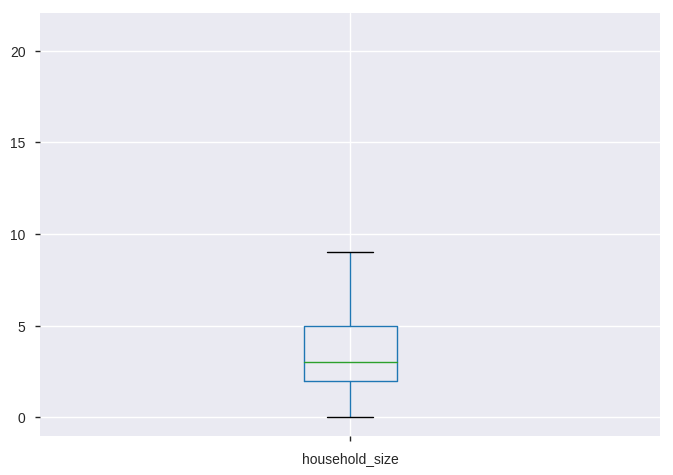

In [0]:
plt.figure(dpi=100)
df2.boxplot('household_size')

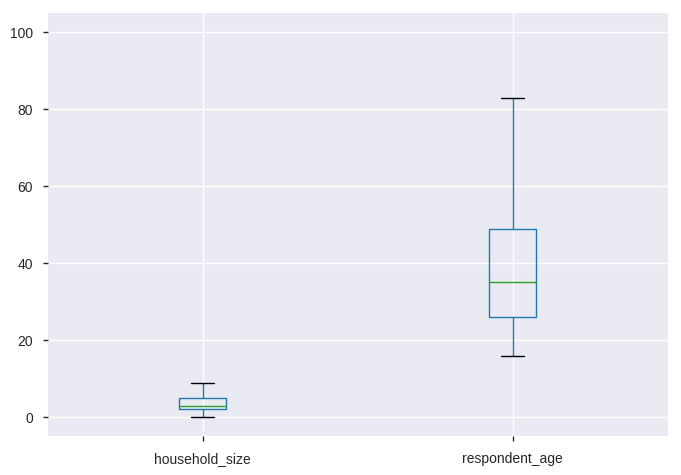

In [0]:
# boxplot = df.boxplot(grid=False, rot=45, fontsize=15)

plt.figure(dpi=100)
boxplot = df2.boxplot(["household_size","respondent_age"])
plt.show()

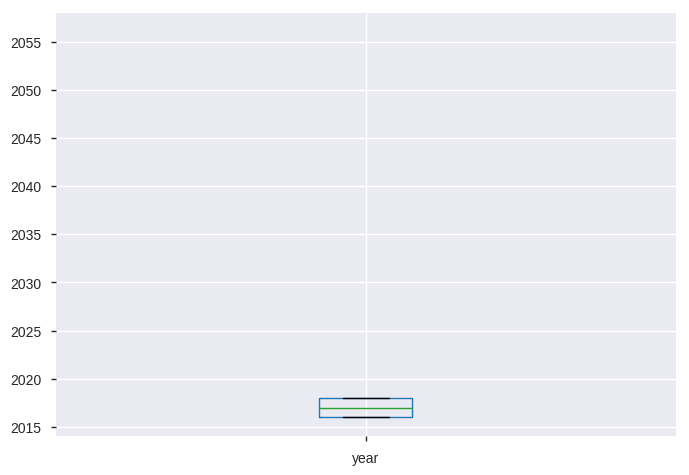

In [0]:
plt.figure(dpi=100)
boxplot = df2.boxplot(["year"])
plt.show()

In [0]:
# checking anomalies, anomalies are the same as outliers and so the outliers that were were identify are the sames as
yr= df2[df2['year']>2019].index

df2.drop(yr,inplace=True)

In [0]:
# checking uniques  years in the  dataset
df2.year.unique()
# from the outcomes we now have the right years because is only possible that the dataset 
#collected between 2016 to 2019 and not any other year beyond 2019 

array([2018, 2016, 2017])

# 1. Univariate analysis

In [0]:

df2.groupby('bank_account')['household_size'].sum()


bank_account
No     74370.0
Yes    11734.0
Name: household_size, dtype: float64

In [0]:

df2.groupby('country').household_size.mean()


country
Kenya       3.987467
Rwanda      4.482612
Tanzania    1.931692
Uganda      4.983771
Name: household_size, dtype: float64

In [0]:
df2.groupby('country').household_size.std()

country
Kenya       2.334725
Rwanda      1.980336
Tanzania    1.055155
Uganda      2.893811
Name: household_size, dtype: float64

In [0]:
df2.groupby('Type of Location').household_size.mean()

Type of Location
Rural    4.187395
Urban    2.905056
Name: household_size, dtype: float64

In [0]:
df2.groupby('year').household_size.sum()

year
2016    38924.0
2017    12556.0
2018    34611.0
2029        6.0
2039        3.0
2056        4.0
Name: household_size, dtype: float64

In [0]:
#finding the range
df2max = df2['household_size'].max()
df2min =df2['household_size'].min()
rangedf2 = (df2max- df2min)
print(rangedf2)
df2max = df2['respondent_age'].max()
df2min =df2['respondent_age'].min()
rangedf3 = (df2max- df2min)
print(rangedf3)

21.0
84.0


In [0]:
#finding the standard deviation
print(df2["household_size"].std())
print(df2["respondent_age"].std())

2.2811835250351495
16.51980349804178


In [0]:
# Finding the variance of the herbicide average prices
print(df2["household_size"].var())
print(df2["respondent_age"].var())


5.20379827489179
272.90390761391353


In [0]:
# Determining the skeweness
print(df2["respondent_age"].skew())
# i did check the skewness in order to confirm outliers in my dataset
#from the dataset Respondent_age is  0.841 .It means the distribution is positively skewed.
print(df2["household_size"].skew())
# for household_size  we also  got 0.974 which is also a positive skewness

0.840661747532081
0.9741086837897069


In [0]:
#Kurtosis  measures  the heaviness of tail in any given data.
# since our data contained outliers we except to have a heavy tail because this how  outliers can be manifested
#in comparision with the narmal distribution.

print(df2["household_size"].kurt())
print(df2["respondent_age"].kurt())
# In both variables,kurtosis is greater than zero, then the distribution has heavier tails and is called 
#a leptokurtic distribution.
#In Household size variable,the kurtosis was 1.154, while in respondent age was 0.09
# this indicated that household size had thicker and heavier in tail compared to respondent age 
#which had a kurtosis of close to zero(0.09)

1.1538690689335573
0.09844652254807196


## **Univariate visalization**

In [0]:
#plotting  pie chart
explode=(0,0.21,)
plt.pie(df2.values, labels=df2.index, explode=explode,
autopct='%1.1f%%', shadow=True, startangle=100)

plt.axis('equal')
plt.title('Pie Chart Households')
plt.show()

In [0]:
df2["household_size"].corr(df2["respondent_age"])

-0.1196711523415487

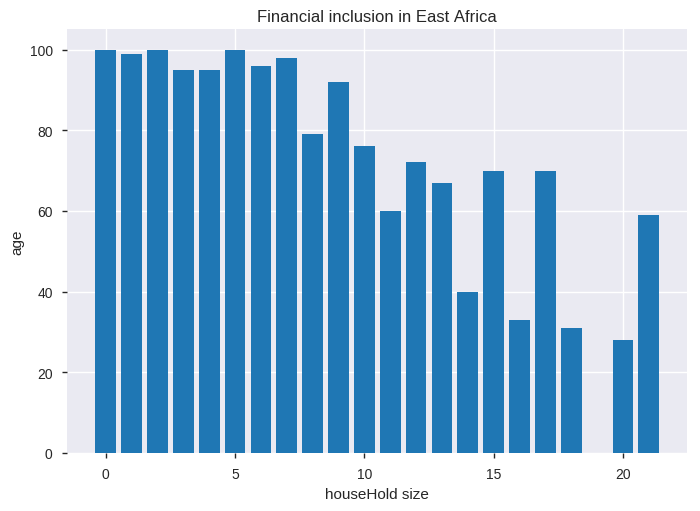

In [0]:
plt.figure(dpi=100)
ff = df2['household_size']
age = df2["respondent_age"]
plt.bar(ff, age)
plt.ylabel("age")
plt.xlabel("houseHold size")
plt.title("Financial inclusion in East Africa")
plt.show()

Text(0.5, 1.0, 'COUNTRY VS THE NUMBER OF HOUSEHOLD')

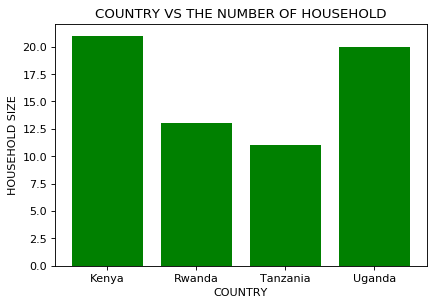

In [0]:
# distribustion of household sizes in  relation to countries and the household_size
# Defining our data
plt.figure(dpi=80)
country = df2['country']
house =  df2["household_size"]
plt.bar(country, house, color='green')
# Labelling our x axis
plt.xlabel("COUNTRY")
# Labelling our y axis
plt.ylabel("HOUSEHOLD SIZE")
# Giving a title to our Bar chart
plt.title("COUNTRY VS THE NUMBER OF HOUSEHOLD")
# Displaying our

In [0]:
df2["household_size"].corr(df2["respondent_age"])

-0.1196711523415487

In [0]:
df2['bank_account'] = df2.bank_account.map({'No':0, 'Yes':1})


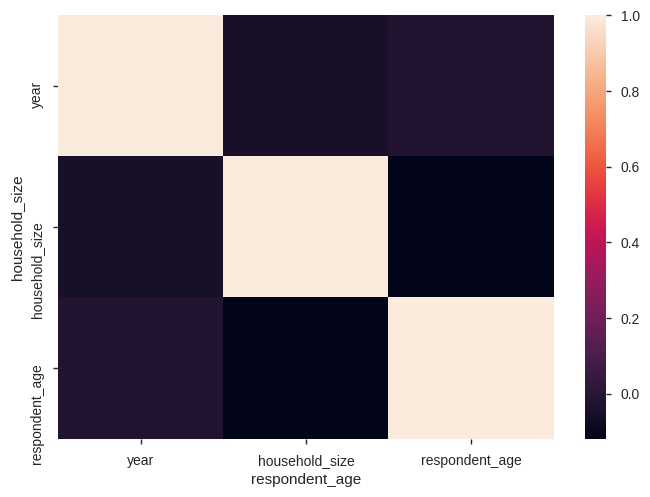

In [0]:
# Plotting the correlation using a heatmap.
# The dark colour represents that there is no linear relationship between the two variables. 
# A lighter shade shows that the relationship between the variables is more linear.
# ---
plt.figure(dpi=100)

sns.heatmap(df2.corr())
plt.xlabel("respondent_age")
plt.ylabel("household_size")
plt.show()

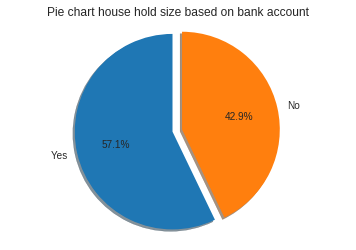

In [0]:
## Pie chart for house hold and bank acoount

hls = df2["household_size"].sample(2)
edl = df2["bank_account"].unique().tolist()
explode = [0,0.1,]

plt.pie(hls, explode=explode, labels=edl, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pie chart house hold size based on bank account')
plt.show() 

In [0]:
# Distribution of household sizes by count with country
df2.groupby('country').household_size.sum()

explode=(0,0,0,0)
plt.pie(df2.values, labels=df2.index, explode=explode,
autopct='%1.1f%%', shadow=True, startangle=100)


plt.axis('equal')
plt.title('Pie chart of % country and household size')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


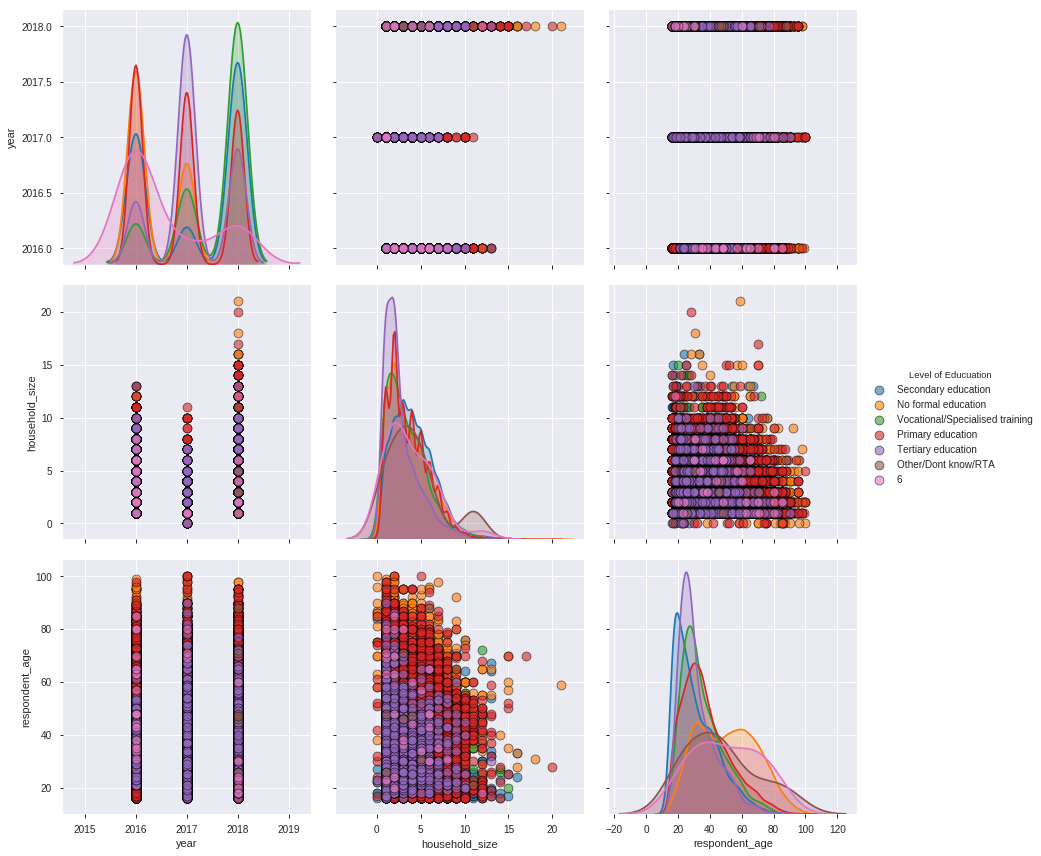

In [0]:
# Create a pair plot colored by  with a density plot of the 
# diagonal and format the scatter plots.
sns.pairplot(df2, hue = 'Level of Educuation', diag_kind = 'kde',
plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4)
# based on what has has been returned in terms of level of education 
# people who had accounts were those who have tertiary level of education

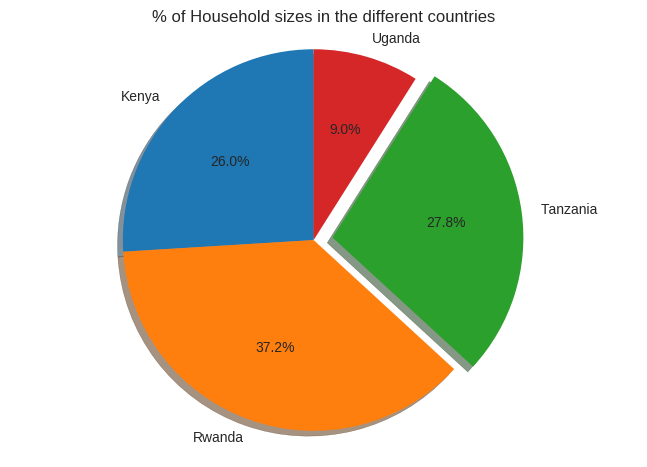

In [0]:
# Distribution of household sizes by count with country
country = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
household = [6062, 8683, 6500, 2095]
explode = [0, 0, 0.1, 0]
# 
plt.pie(household, labels=country, explode=explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('% of Household sizes in the different countries')
plt.show()
# it shows that Rwanda had the highest number of  household sizes followed by  Tanzania

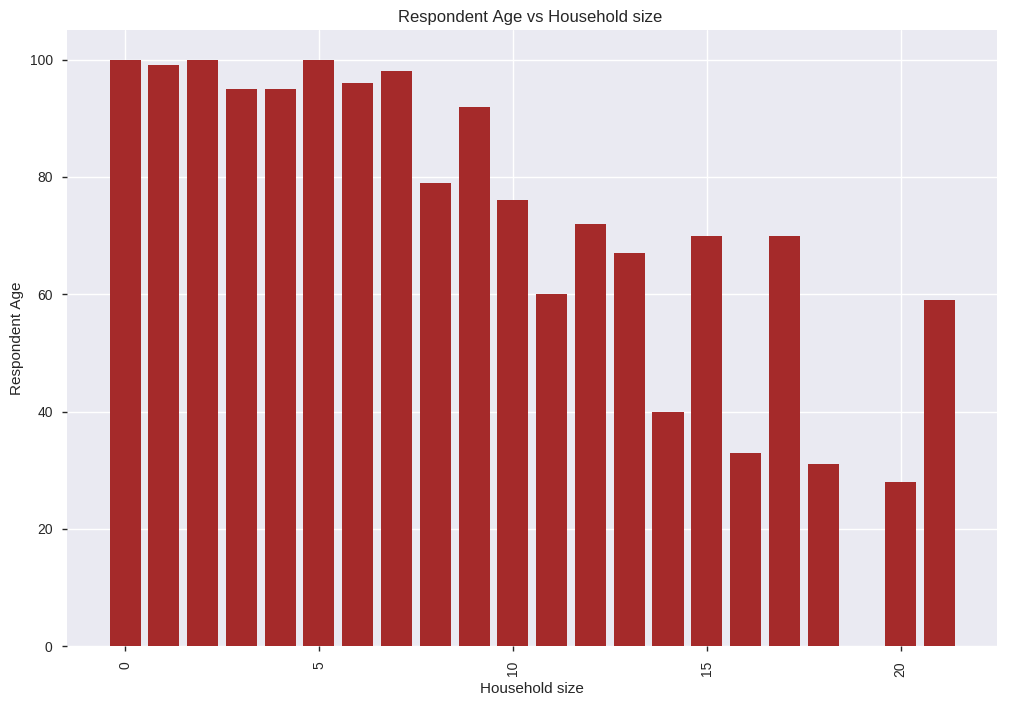

In [0]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(df2.household_size, df2.respondent_age, color='brown')
plt.xticks(rotation=90)
ax.set_xlabel('Household size')
ax.set_ylabel('Respondent Age')
plt.title('Respondent Age vs Household size ')
plt.show()

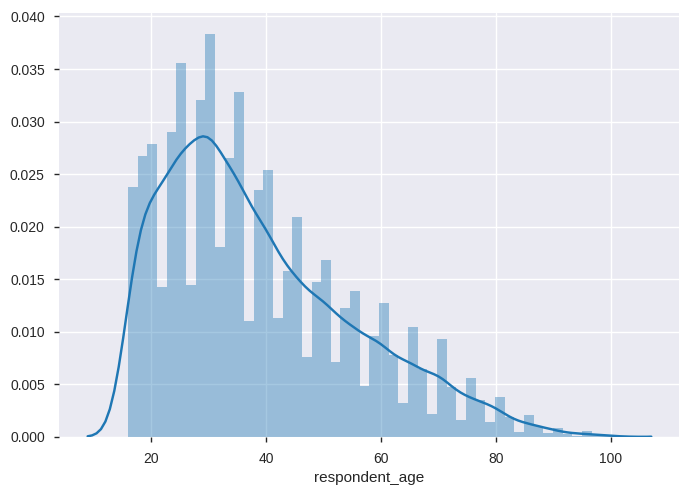

In [0]:
# Plotting a histogram of the respondent's ages
# proj['respondent_age'].hist()
#
sns.distplot(df2.respondent_age, kde = True)
# as the number respondent age increase its count decreases
# the highest count is between respondent age of 10 to 46
#his shows the smooth curve that tell as that as the respondent age increases the frequency decrease

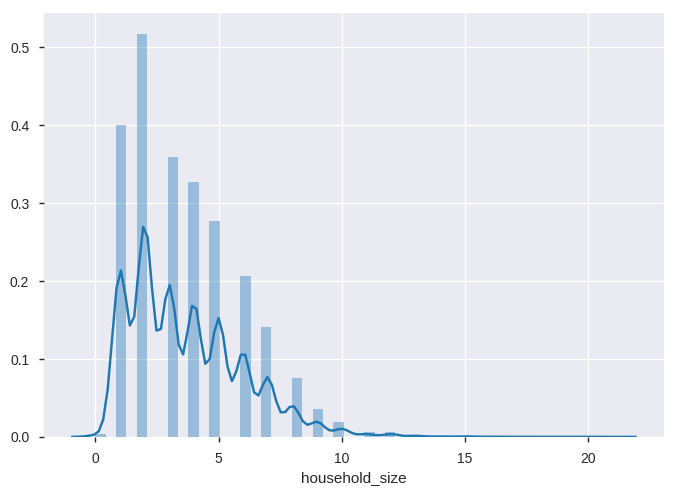

In [0]:
sns.distplot(df2.household_size, kde = True)
# the highest count is 5
#As the number of household size increasres the number of count decreases
# Noted that frequence of household size is also fractuating but at the end it normalises

# Bivariate  analysis

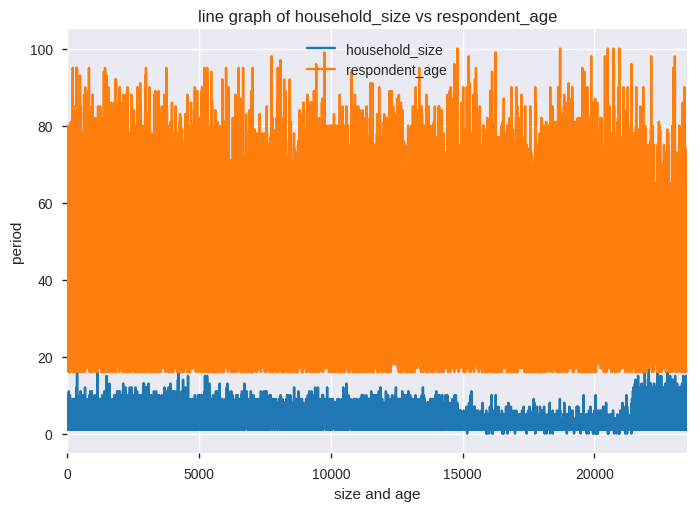

In [0]:

df2[['household_size','respondent_age']].plot()
plt.title('line graph of household_size vs respondent_age')
plt.xlabel('size and age')
plt.ylabel('period')
plt.show()

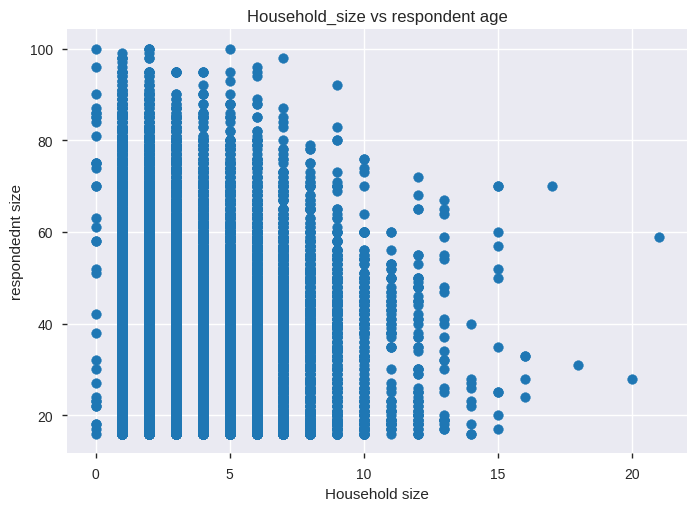

In [0]:


#Plotting our scatterplot to compare the variables
plt.scatter(df2['household_size'],df2['respondent_age'])


#title
plt.title('Household_size vs respondent age')
#labelling x axis
plt.xlabel('Household size')
plt.ylabel('respondednt size')
plt.show()



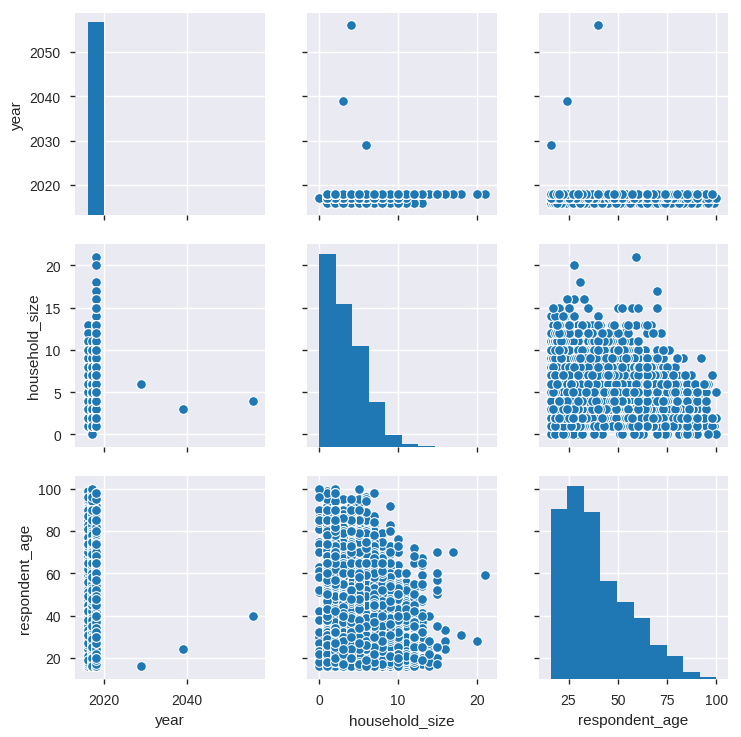

In [0]:
# Creating a pairplot to build histograms and scatter plots.
# ---
sns.pairplot(df2)
# The pair plot was buld on two basic figures  and tha is histogram and scatter plot
#Histogram allowed me to view the distribution of variables.
# scatter plot allowed me to see res the relationship between the variables
#

<Figure size 480x320 with 0 Axes>

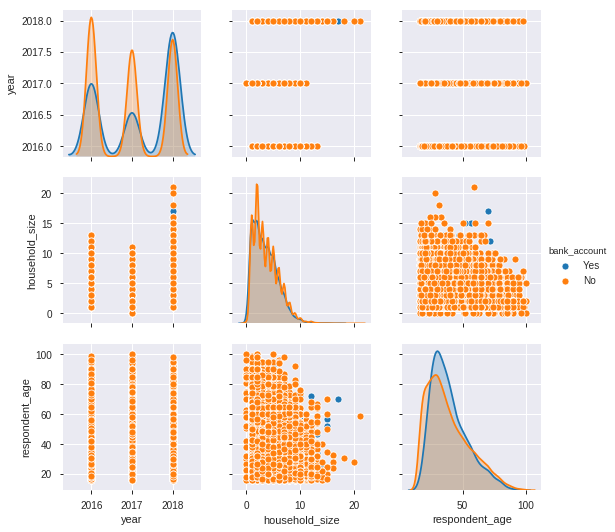

In [0]:
plt.figure(dpi=80)
sns.pairplot(df2, hue = 'bank_account','')

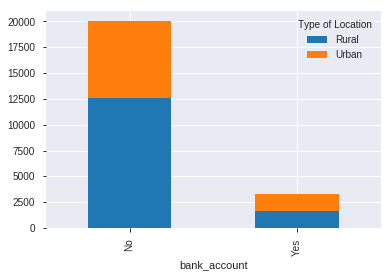

In [0]:
#Stacked bar plot with two-level group byPermalink

df2.groupby(['bank_account','Type of Location']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
#From the stacked bar graph  there were people  without bank accounts and  a bigger portion was from rural areas
# Those that possed a bank account were almost the same in urban and rural areas

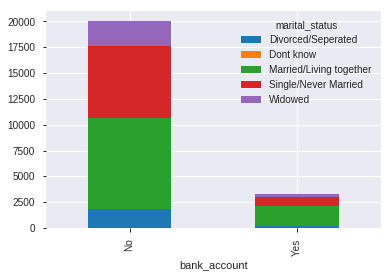

In [0]:
df2.groupby(['bank_account','marital_status']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
#In both Yes and No bank accounts married people were the one leading i n terms of  all those that contained the bank account followed by single  individuals 
# possibility are the number could also increase especial where we have respondent age approaching marriage.

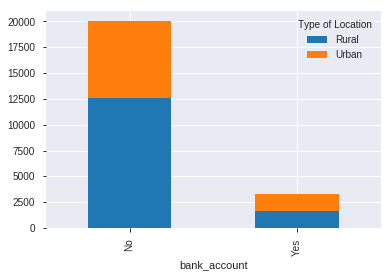

In [0]:
df2.groupby(['bank_account','Type of Location']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
# generally Urban areas were leading in terms of those that possed a bank account 


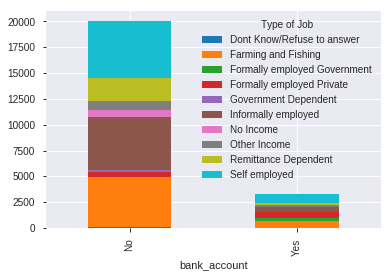

In [0]:
df2.groupby(['bank_account','Type of Job']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
#From the grapg we can relate both the bank Accounts and job
#Many  of those who had bank accounts were farmers/fishers and self employmed

In [0]:
#Correlation
#Correlation is a statistical measure that describes the association between random variables. 
#In this section, will use pandas to calculate the correlation coefficient. 
#We will calculate the pearson correlation coefficient which is the most widely used correlation coefficient.

 #Determine the relationship between the repondents age in relation  households sizes 
# Calculating the pearson coefficient
p_coeff = df2["respondent_age"].corr(df2["household_size"], method="pearson") 
print(p_coeff)

# Checking whether you have to define the pearson
coeff = df2["respondent_age"].corr(df2["household_size"]) 
print(coeff)
# Correlation coefficients between -.20 and .20 are generally considered weak, 
# A negative (inverse) correlation occurs when the correlation coefficient is less than 0 
# and indicates that both variables(respondent age and househol sizea)  are know to move in the opposite direction. 
#-0.11970929714642344
# Since the correlation coefficent of household_sizeis and Respondent_age" is  , Respondent_age and 
# this means that  are moderately correlated.

-0.11967115234154871
-0.11967115234154871


# Multivariate Analysis

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

**preprocessing**

In [0]:
df2.corr()

,year,household_size,respondent_age
year,1.000000,-0.052484,-0.018554
household_size,-0.052484,1.000000,-0.119671
respondent_age,-0.018554,-0.119671,1.000000


In [0]:
#turn column into dummy variable
#bank=pd.get_dummies(df2['bank_account'])
#bank.head()

In [0]:
#df2=df2.merge(bank,right_index=True,left_index=True)
#df2.head()

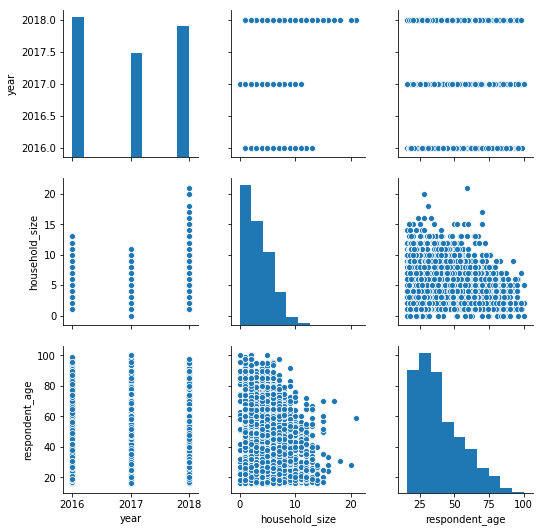

In [0]:
# Creating a pairplot to build histograms and scatter plots.
# The histogram on the diagonal allows us to see the distribution of a single 
# The scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.
sns.pairplot(df2)

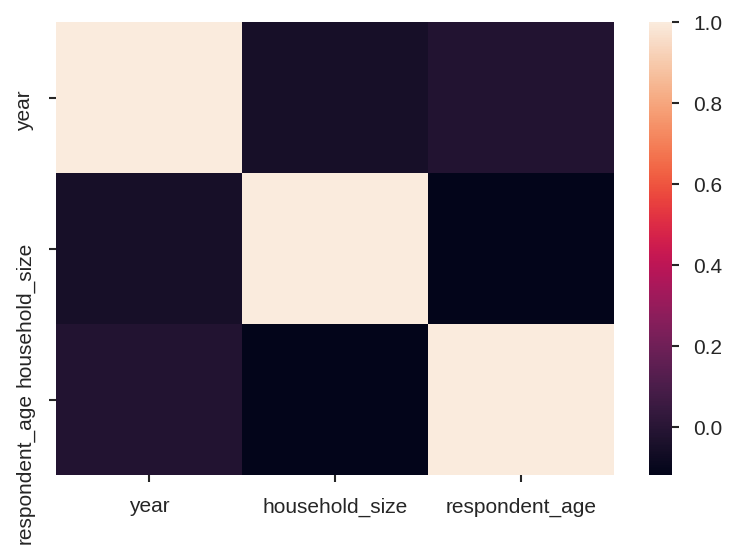

In [0]:
# Plot the correlation using a heatmap.
# The black colour represents that there is no linear relationship between the two variables. 
# A lighter shade shows that the relationship between the variables is more linear.

plt.figure(dpi=150)

sns.heatmap(df2.corr())

In [0]:
#The first we divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
a= df2.drop(['country','year','bank_account','Type of Location','Cell Phone Access','gender_of_respondent','The relathip with head','marital_status','Level of Educuation','Type of Job'], axis=1)
b = df2['bank_account']

In [0]:
a.head()

,household_size,respondent_age
0,3.0,24.0
1,5.0,70.0
2,5.0,26.0
3,5.0,34.0
4,8.0,26.0


In [0]:
b.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: bank_account, dtype: object

In [0]:
b['bank_account'] = b.bank_account.map({'No':0, 'Yes':1})

In [0]:
b.eq('Yes').mul(1)
pd.Series(np.where(b.values == 'yes', 1, 0),sample.index)
b.map(dict(Yes=1),No=1)
pd.Series(map(lambda x:dict(yes=1, no=0)[x],b.values.tolist()), sample.index)
pd.Series(np.searchsorted(['no', 'yes'], b.values), sample.index)


In [0]:
# Splitting the dataset into the Training set and Test set
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=0)

In [0]:
# # Standardizing by use of standize scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)


In [0]:
#Applying PCA
# first we Initialize the PCA class by passing the number of components to the 
#Call the fit and then transform methods by passing the feature set
##
from sklearn.decomposition import PCA

pca = PCA()
a_train = pca.fit_transform(a_train)
a_test = pca.transform(a_test)
# in the code above  we created  a PCA object named pca
# thsi means all the three variables will be return in  both testing and training

In [0]:
# what follows is  explaining the variance ratio.
# the code below explian how variance ratio is done
##
explained_variance = pca.explained_variance_ratio_
explained_variance 
#the varianc ratio  of the two dataset is 0.56 and 0.44

array([0.55968711, 0.44031289])

In [0]:
# applying PCA projection
##
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
a = pca.fit_transform(a_train)
a_test = pca.transform(a_test)


### **Training and Making Predictions**


In [0]:
#In this case we'll use random forest classification for making the predictions.
# Random forest help to predict which  variable  have the most predictive power
# Variable of  importance  are 
#drivers of the outcome and their values  have signicant on the outcome
#Variables with low importance are omitted from the model
# This makes it easier  and faster  to fit  and predict 
# high or low importance is based on the level of  percentage of accuracy

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(a, b_train)

# Predicting the Test set results
b_pred = classifier.predict(a_test)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Performance Evaluation


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(b_test, b_pred)
print(cm)
print('Accuracy',accuracy_score(b_test, b_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


In [0]:
# component two
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
a = pca.fit_transform(a_train)
a_test = pca.transform(a_test)


In [0]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(a, b_train)

# Predicting the Test set results
b_pred = classifier.predict(a_test)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(b_test, b_pred)
print(cm)
print('Accuracy',accuracy_score(b_test, b_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


In [0]:
# both variables
from sklearn.decomposition import PCA

pca = PCA()
a = pca.fit_transform(a_train)
a_test = pca.transform(a_test)


In [0]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(a, b_train)

# Predicting the Test set results
b_pred = classifier.predict(a_test)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(b_test, b_pred)
print(cm)
print('Accuracy',accuracy_score(b_test, b_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


In [0]:
#preprocessing
g=df2.drop('bank_account',axis=1)
h=df2['bank_account']

In [0]:
# Convert categorical variables to numerical values
g = pd.get_dummies(g)
g.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,2018,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
# Splitting the dataset into the Training set and Test set
# Our goal is to create a model that generalises well to new data. Our test set serves as a proxy for new data. 
# Trained data is the data on which we apply the linear regression algorithm. 
# 40% of the data meant to the test data and the rest remains in the training set.
#  we  will test  algorithm on the test data. 

g_train, g_test, h_train, h_test = train_test_split(g, h, test_size = 0.4, random_state = 101)

In [0]:
g.isnull().sum()


In [0]:
# We then created and trained the model by fitting the linear regression model on the training data.

#lm = LinearRegression()
#results = lm.fit(g_train,h_train)
#results

# # Standardizing by use of standize scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
g_train = sc.fit_transform(g_train)
g_test = sc.transform(g_test)


In [0]:

#from sklearn.decomposition import PCA
#appying pca
from sklearn.decomposition import PCA
pca = PCA()
g_train = pca.fit_transform(g_train)
g_test = pca.transform(g_test)

In [0]:
# what follows is  explaining the variance ratio.
# the code below explian how variance ratio is done
##
explained_variance = pca.explained_variance_ratio_
explained_variance 


array([1.01607900e-01, 7.18106007e-02, 6.99902976e-02, 6.13337622e-02,
       5.18173198e-02, 4.59814150e-02, 3.96011719e-02, 3.56715928e-02,
       3.47576968e-02, 3.13346741e-02, 2.97969354e-02, 2.70533594e-02,
       2.63832703e-02, 2.54812887e-02, 2.50582559e-02, 2.47850638e-02,
       2.46287495e-02, 2.42492425e-02, 2.41127684e-02, 2.40623718e-02,
       2.35567117e-02, 2.33044198e-02, 2.19890336e-02, 2.10006900e-02,
       1.96665081e-02, 1.91804591e-02, 1.53355077e-02, 1.31472383e-02,
       1.14918886e-02, 1.11121060e-02, 9.30312130e-03, 8.84497564e-03,
       2.54960343e-03, 2.81125509e-31, 2.00386250e-32, 5.27345677e-33,
       4.53951186e-33, 3.37436742e-33, 2.18667715e-33, 8.18075350e-34,
       3.00142604e-35])

In [0]:
# The PCA Projection

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
g_train = pca.fit_transform(g_train)
g_test = pca.transform(g_test)

In [0]:
# Training and Making Predictions.
# 
## Our ensemle method is Random Forest as it best with huge data
from sklearn.ensemble import RandomForestClassifier

clas = RandomForestClassifier(max_depth=2, random_state=0)
clas.fit(g_train, h_train)

h_pred = clas.predict(g_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
# Performance Evaluation
#  This is by using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(h_test, h_pred)
print(cm)

[[8026    0]
 [1312    0]]


In [0]:
## This is performance evaluation using  accuracy score
print('Accuracy ', str(accuracy_score(h_test, h_pred)))

Accuracy  0.8594988220175627


In [0]:
## Results with Full  features set
##
pc = PCA()
g_train = pc.fit_transform(g_train)
g_test = pc.transform(g_test)

clas1 = RandomForestClassifier(max_depth=2, random_state=0)
clas1.fit(g_train, h_train)

h_pred = clas1.predict(g_test)
 
conf = confusion_matrix(h_test, h_pred)
print(conf)
print(accuracy_score(h_test, h_pred))


[[8026    0]
 [1312    0]]
0.8594988220175627


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**linear regression**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [0]:
g.head(1)

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,2018,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
h.eq('Yes').mul(1)
pd.Series(np.where(h.values == 'yes', 1, 0),sample.index)
h.map(dict(Yes=1),No=1)
pd.Series(map(lambda x:dict(yes=1, no=0)[x],
              h.values.tolist()), sample.index)
pd.Series(np.searchsorted(['no', 'yes'], h.values), sample.index)



In [0]:
h.head()

In [0]:
# Our goal is to create a model that generalises well to new data. Our test set serves as a proxy for new data. 
# Trained data is the data on which we apply the linear regression algorithm. 
# 40% of the data will go to the test data and the rest remains in the training set.
# And finally we test that algorithm on the test data. The code for splitting is as follows
# ---
g_train, g_test, h_train, h_test = train_test_split(g, h, test_size = 0.4, random_state = 101)

In [0]:
# We then create and train the model by fitting the linear regression model on the training data.
# ---
lm = LinearRegression()
results = lm.fit(g_train,h_train)
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Grabbing predictions off the test set and see how well it did
# ---
from sklearn.linear_model import LinearRegression
predictions = lm.predict(g_test)
predictions

array([[ 0.88929749,  0.11070251],
       [ 0.93827629,  0.06172371],
       [ 0.52659607,  0.47340393],
       ...,
       [ 0.34331512,  0.65668488],
       [ 1.03719139, -0.03719139],
       [ 1.00641251, -0.00641251]])

In [0]:
# Then visualising the prediction
# ---
#plt.scatter(h_test,predictions)

# **Documentation**


# *Figure out how we can predict which individuals are most likely to have or use a bank account?*

IBased on the  Exploratory analysis that i did ,I would say that :
Based on Marital stutus, married individuals are the one who have high number of bank accounts followed by  by those individuals who are single.

Based on Type of job, Famers./Fisher and self employed individuals  are the one leading in terms of bank account. This is a true indication that as the number increases  the country gets to group economically . 
This , this means  such individual will have financial stability and also qualify for a credit from financial instition.

Based on type of location , Rural areas  have high number of  individuals with out bank accounts compared to urban areas.

Analysis has also shown that,there is s positive person coreelation between household size and the number of respondent age.

From analysis I was able to develop a model that would test the  variables and how they influence the dependent variable which was bank acoount.
The accuracy level was 86.5%. I this  a strong model since has exceeded the threshold which is 60%.
In order to claculate the accuracy i used random forest predict which  variable  have the most predictive power.
